In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from blinky import Blinky
from finetune_utils import get_peft_model, merge_peft_model, Config
from datasets import load_dataset
from processor import BlinkyProcessor
from PIL import Image

In [2]:
config = Config(
    embed_dim = 576,
    intermediate_dim = 1536,
    max_position_embeddings = 8192,
    base_theta = 100000,
    num_q_heads = 9,
    num_kv_heads = 3,
    attn_dropout = 0.,
    num_layers = 30,
    vocab_size = 49152 + 3,
    dtype = torch.bfloat16,
    eos_token_id = 2,
    image_start_token_id = 49152,
    image_end_token_id = 49153,
    image_token_id = 49154,
    num_image_tokens=256,
    prefix_length=1+256+1 #<|start_of_image|>256*<|image_token|><|end_of_image|>
)

In [3]:
model = Blinky(config)

In [4]:
sd = torch.load('./Blinky/model.pt')

In [5]:
model.load_state_dict(sd)

<All keys matched successfully>

In [6]:
model._tie_weights()

In [7]:
processor = BlinkyProcessor('./Blinky')

In [8]:
sample = [{
    'text': [{'role':'user','content':'can you describe the image?'}],
    'image': Image.open('./tests/car.jpg')
}]

In [9]:
inputs = processor(sample)

In [10]:
{k:v.shape for k,v in inputs.items()}

{'input_ids': torch.Size([1, 296]),
 'pixel_values': torch.Size([1, 3, 512, 512])}

In [11]:
# model = model.cuda()

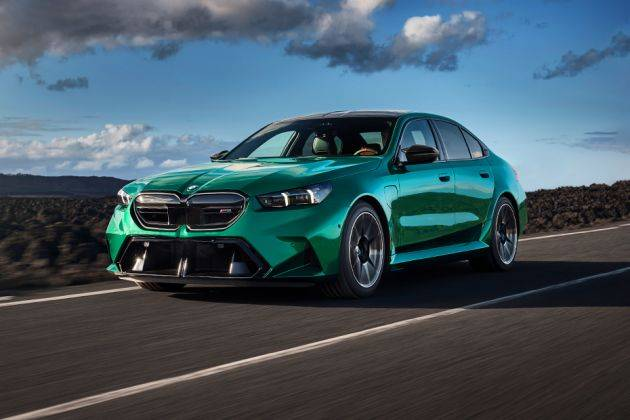

In [12]:
sample[0]['image']

In [13]:
%env CUDA_LAUNCH_BLOCKING='1'

env: CUDA_LAUNCH_BLOCKING='1'


In [14]:
model.eval()
max_tokens = 200
deterministic = False
context = inputs['input_ids']
pixel_values = inputs['pixel_values'] 
sequence = context

In [15]:
inputs['input_ids']

tensor([[49152, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154, 49154,
         49154, 49154, 49154, 49154, 49154, 49154, 4

In [16]:
model

Blinky(
  (vision_model): VisionEncoder(
    (vision): SiglipVisionModel(
      (vision_model): SiglipVisionTransformer(
        (embeddings): SiglipVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), padding=valid)
          (position_embedding): Embedding(1024, 768)
        )
        (encoder): SiglipEncoder(
          (layers): ModuleList(
            (0-11): 12 x SiglipEncoderLayer(
              (self_attn): SiglipSdpaAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
              (mlp): SiglipMLP(
                (activation_fn): PytorchGELUTanh()
             

In [ ]:

for _ in tqdm(range(max_tokens)):
    with torch.inference_mode():
        out = model(input_ids=sequence, pixel_values=pixel_values)
    out = out[:,-1,:]
    print(out)
    # probs = F.softmax(out,dim=-1)
    # if deterministic:
    #     next_token = torch.argmax(probs,dim=-1,keepdim=True)
    # else:
    #     next_token = torch.multinomial(probs,num_samples=1)
    # print(next_token)
    # sequence = torch.cat([sequence,next_token],dim=1)
    # if next_token.item() == processor.tokenizer.eos_token_id:
    #     break

  0%|          | 0/200 [00:00<?, ?it/s]

tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.bfloat16)
tensor([[nan, nan, nan,  ..., nan,

In [ ]:
decoded = processor.tokenizer.decode(sequence[:,context.shape[1]:].cpu().flatten().numpy())
print(decoded)

In [ ]:
model.text_model.embed_tokens(torch.tensor([49152,49153,49154]).cuda()).unique()

In [ ]:
m=torch.triu(torch.ones(6,6),diagonal=1)
m[:3,:3] = 0
m

In [ ]:
a=torch.rand(6,6)
a

In [ ]:
a.masked_fill_(m.bool(),-torch.inf)

In [ ]:
a.masked_fill_(m.bool(),-torch.inf).softmax(dim=1)